# Matrix factorization

## Why matrices?

Lots of data we see and work with in data science can be represented as matrices. Here are few examples.

<img src="figs/1_EYafWiSsDrBM9vI1bimTsA.webp">

## Why matrix factorization?

Data matrices we observe contains patterns/behaviors of the sources that generated this data.

It sounds a bit surreal to hear that splitting up data into multiple parts reveal underpinning patterns found in data. It turns out, projecting data into a latent space forces the resulting matrix to learn patterns separate out noise.

There are many different MF algorithms which exploit various properties on the resulting factorized matrices. Some may constrain the values to be non-negative while others enforce sparsity. Therefore the algorithm you use will dictate the nature of the result you get. 

### The Intuition Behind SVD

Let’s reduce the problem to people and their favorite food. We assume we have a m x n matrix A, where m represents the number of people and n is the number of possible food types. The matrix values represent how much a person likes a food type, encoded as a rating from 1 to 10.

Here is an example of a 3x4 matrix with three people and four food types:

<img src="figs/1_tmEOm6udBagg3a9z-JBEGA.webp">

SVD decomposes any matrix m x n A into three matrices, U, S, and V, where A = USVᵀ.

How can we explain this formula with our example about people and their favorite food types?

Let’s start answering the question above with another question to understand the thought process behind it. In our example matrix A, we have three people with their ratings for four types of food. But what if we want to understand why some people rated one kind of food over the other? To dig into that, we need to find a set of characteristics that describe the interaction between people and their favorite food types.

We want to find out why “person 1” enjoys eating apples more than sausages.

Using SVD, we can quickly get the characteristics that will help us understand the question from above.

Here is how the decomposed matrix A = USVᵀ looks:

<img src="figs/1_JWlFkzJI7vKCCtCoYmkzPA.webp">

The SVD algorithm created a set of features that describe the interaction between the people and their favorite food types.

In our case, the features learned by the algorithm are Health, Meat, and Cooked. Those are known as latent features.

Note: We randomly labeled the latent features Health, Meat, and Cooked. Those are abstract representations, we named them to understand the concept quickly, but those could have any other label.

The matrix U is a m x k matrix, where k is the number of latent features. It represents how a person interacts or “ feels” about the latent features and mathematically describes whether they like healthy, meat-based, or cooked food. Generally speaking, it represents the relation between the rows of matrix A and the latent factors.

The matrix S is a k x k diagonal matrix that informs us about the importance of every feature. In particular, it encodes which Health, Meat, or Cooked features are more important. A more considerable value represents that a specific latent feature carries more information and can predict better what type of food the person likes. The diagonal values of S are ordered in descending order, which means that always the first latent feature carries more information than the other features.

The matrix Vᵀ is a k x n matrix that describes how latent features interact with a type of food. Generally speaking, it represents the relationship between the latent factors and the columns of matrix A.

### How to Compute SVD

We can efficiently compute the SVD matrices with Python and Scipy:

In [1]:
import numpy as np
import scipy
A = np.array(
    [[1, 5, 10, 9], [8, 9, 3, 4], [10, 8, 9, 19]], 
    dtype=int
)
U, s, V_T = scipy.linalg.svd(A)

## Matrix factorization in image compression

Matrix factorization can be used to store important content of an image needed to reconstruct it later (with a smaller memory footprint). Here we will be learning about a technique called singular value decomposition (SVD). The idea behind SVD is to represent matrix A with the multiplication of three matrices; U, Σ and V.

$$ A = U \Sigma V$$

Here A is n x m, U is n x n Σ is n x m and V is m x m.

The matrix Σ is a diagonal matrix that contains the singular values in the diagonal, an important by-product of SVD. These singular values indicate how much variance is captured by each row/column of U and V (or singular vectors). The more variance you capture, the better the reconstruction would be.

The other great thing is that the singular values are ordered in decreasing order. Which means to get the p most important singular values, you just cut your matrices only to contain that many singular values.

<img src="figs/1_pQrImGuXkxN_I_mHtdUsxQ.webp">

There are different variants of SVD. Getting only the p largest singular values without computing full factorization is called truncated SVD. And a more efficient approximated variant of that is known as randomized SVD.

In [2]:
print(U)
print(s)
print(V_T)

[[-0.43972053 -0.56499952 -0.69815571]
 [-0.36522179  0.82265295 -0.43572372]
 [-0.82052355 -0.06338501  0.56808753]]
[29.7685781   8.28389759  5.3111956 ]
[[-0.38855502 -0.40478209 -0.43258978 -0.70572129]
 [ 0.64973932  0.49153177 -0.45298743 -0.36199134]
 [ 0.28184422 -0.53991456 -0.59797092  0.52104403]
 [-0.58942994  0.55049092 -0.50009924  0.31532975]]


In [1]:
import sklearn
print(f"Using scikit-learn version: {sklearn.__version__}")
from sklearn.utils.extmath import randomized_svd
import numpy as np
import cv2
import matplotlib.pyplot as plt

Using scikit-learn version: 1.2.0


(-0.5, 511.5, 511.5, -0.5)

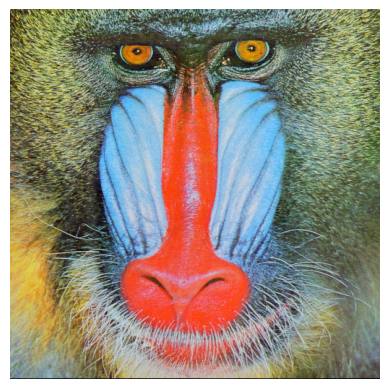

In [3]:
# Image download link: https://sipi.usc.edu/database/download.php?vol=misc&img=4.2.03
image_rgb = plt.imread("figs/4.2.03.tiff")
plt.imshow(image_rgb)
plt.axis("off")

## Convert to grayscale

(-0.5, 511.5, 511.5, -0.5)

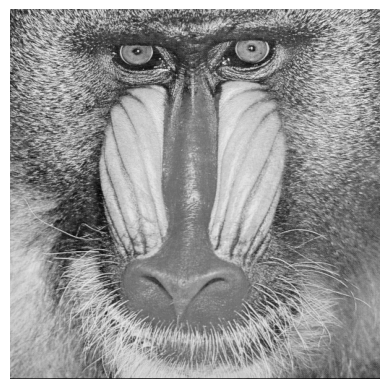

In [4]:
image_bw = 0.2126 * image_rgb[:, :, 0] + 0.7152 * image_rgb[:, :, 1] + 0.0722 * image_rgb[:, :, 2]
plt.imshow(image_bw, cmap='gray')
plt.axis("off")

## Performing randomized SVD

In [5]:
U, Sigma, V = randomized_svd(image_bw, n_components=10)
compressed_image = np.dot(np.dot(U, np.diag(Sigma)), V)

## Plotting SVD results for different number of components

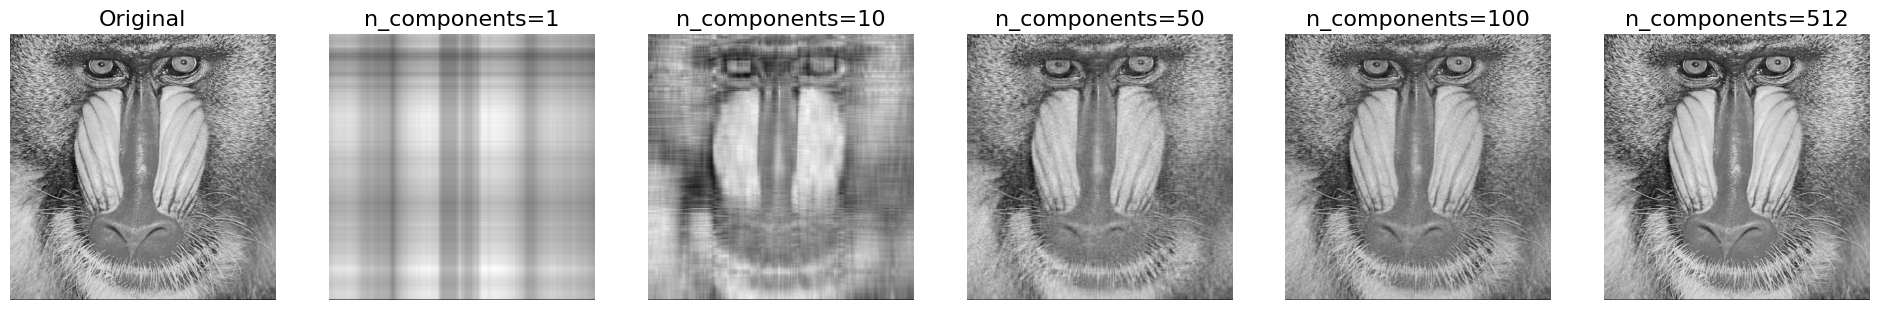

In [6]:
fontsize = 16

f, axes = plt.subplots(1, 6, figsize=(24, 4))

# Plotting the original image
axes[0].imshow(image_bw, cmap='gray')
axes[0].axis("off")
axes[0].set_title("Original", fontsize=fontsize)

for i, n_components in enumerate([1, 10, 50, 100, 512]):
    # Reconstructing the image with different number of comps
    U, Sigma, V = randomized_svd(image_bw, n_components=n_components)
    compressed_image = np.dot(np.dot(U, np.diag(Sigma)), V)
    
    # Plotting the result
    axes[i+1].imshow(compressed_image, cmap="gray")
    axes[i+1].axis("off")
    axes[i+1].set_title(f"n_components={n_components}", fontsize=fontsize)

Let’s compute compression for k=10 for a 512x512 image.

- Original image = 512x512 = 262144 pixels

- Reconstructed = 512x10 + 10x10 + 10x512 = 10340 pixels (Just ~4% of the original image)

Nice! We just reconstructed an approximation with just a 4% memory footprint of the original.

## Background/Foreground detection

Video download link: http://backgroundmodelschallenge.eu/data/real/Video_003.zip

First of all we represent our video as a matrix of size l x f, where l is the length of a single frame (i.e. height and width of the grayscale frame unwrapped to a 1D vector) and f is the number of frames in the video. In our case, we have a matrix of size 76800 x 794 (each image is a 320x240=76800 pixels).

In [7]:
vidcap = cv2.VideoCapture('figs/Video_003.avi')

# Read the first frame
success,image = vidcap.read()
count = 0
frames = []

# Keep reading until you run out of frames
while success:
    # Gray scale frame
    image_bw = 0.2126 * image[:, :, 0] + 0.7152 * image[:, :, 1] + 0.0722 * image[:, :, 2]
    frames.append(image_bw)
    success,image = vidcap.read()
  
    count += 1

# Stack all frames to get the video matrix
frames = np.stack(frames, axis=0)
print(f"Shape of the original matrix: {frames.shape}")
# Transpose so that a single frame is in a single column
frames_t = frames.reshape(794, -1).T
print(f"Shape of the transpose matrix: {frames_t.shape}")

Shape of the original matrix: (794, 240, 320)
Shape of the transpose matrix: (76800, 794)


## Plotting the video

(-0.5, 76799.5, 793.5, -0.5)

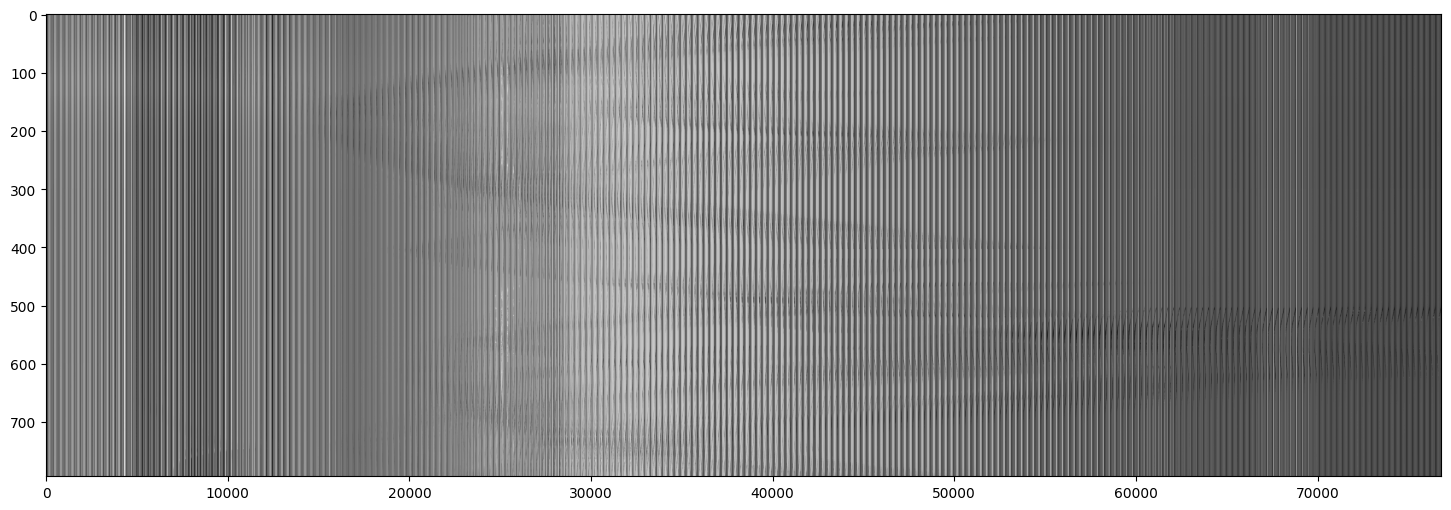

In [8]:
f, ax = plt.subplots(1, 1, figsize=(18, 6))
ax.imshow(frames_t.T, cmap="gray")
plt.axis('tight')

## Robust PCA(rPCA)

For this task we will be using a different matrix factorization technique called robust PCA (rPCA). The idea is to factorize a given matrix M as follows.

$$ M = L + S $$

Here, L is a low-rank approximation and S is a sparse matrix.

Rank of a matrix is known as the number of linearly independent columns. A column is linearly independent if it cannot be derived as a linear transformation of other columns in the matrix. Why is that important? Because the more linearly dependent columns you have in a matrix, the more redundant information there is — because you derive them from the independent ones. If you think about the video feed from a CCTV camera, the background is static, thus contains very little information (or low entropy). So we can probably represent the background with small number of linearly independent columns. In other words if I was to represent the content of M as a low-rank matrix L, I would capture the background present in M in it.

Side note: In SVD the number of non-zero singular values represent the rank of that matrix.

What about the sparse matrix. That one would make more sense. In a video feed, a static background would contain most data (data, not information) in terms of the volume. The remaining sparse information belongs to foreground — because foreground is typically taking small space in the video. Therefore, if I try to force <b>M</b> to become a sparse matrix <b>S</b>, I’d probably capture foreground movements in S. Another way to think is that, <b>S</b> captures the outliers in your data!

Now adding up L and S should give us the original video, which is what the robust PCA equation is saying.

## Robust PCA implementation

Originally from: https://freshprinceofstandarderror.com/ai/robust-principal-component-analysis/

In [9]:
def shrink(X,tau):
    Y = np.abs(X)-tau
    return np.sign(X) * np.maximum(Y,np.zeros_like(Y))

def SVT(X,tau):
    U,S,VT = np.linalg.svd(X,full_matrices=0)
    out = U @ np.diag(shrink(S,tau)) @ VT
    return out

def RPCA(X, n_iter=25):
    n1,n2 = X.shape
    mu = n1*n2/(4*np.sum(np.abs(X.reshape(-1))))
    lambd = 1/np.sqrt(np.maximum(n1,n2))
    thresh = 1e-9 
    
    S = np.zeros_like(X)
    Y = np.zeros_like(X)
    L = np.zeros_like(X)
    count = 0
    while (np.linalg.norm(X-L-S) > thresh) and (count < n_iter):
        L = SVT(X-S+(1/mu)*Y,1/mu)
        S = shrink(X-L+(1/mu)*Y,lambd/mu)
        Y = Y + mu*(X-L-S)
        count += 1
        print(f"{count}/{n_iter} steps completed", end="\r")
        
    return L,S

L, S = RPCA(frames_t)

In [10]:
print(f"L.shape: {L.shape}")
print(f"S.shape: {S.shape}")

L.shape: (76800, 794)
S.shape: (76800, 794)


## Plotting background and foreground separately

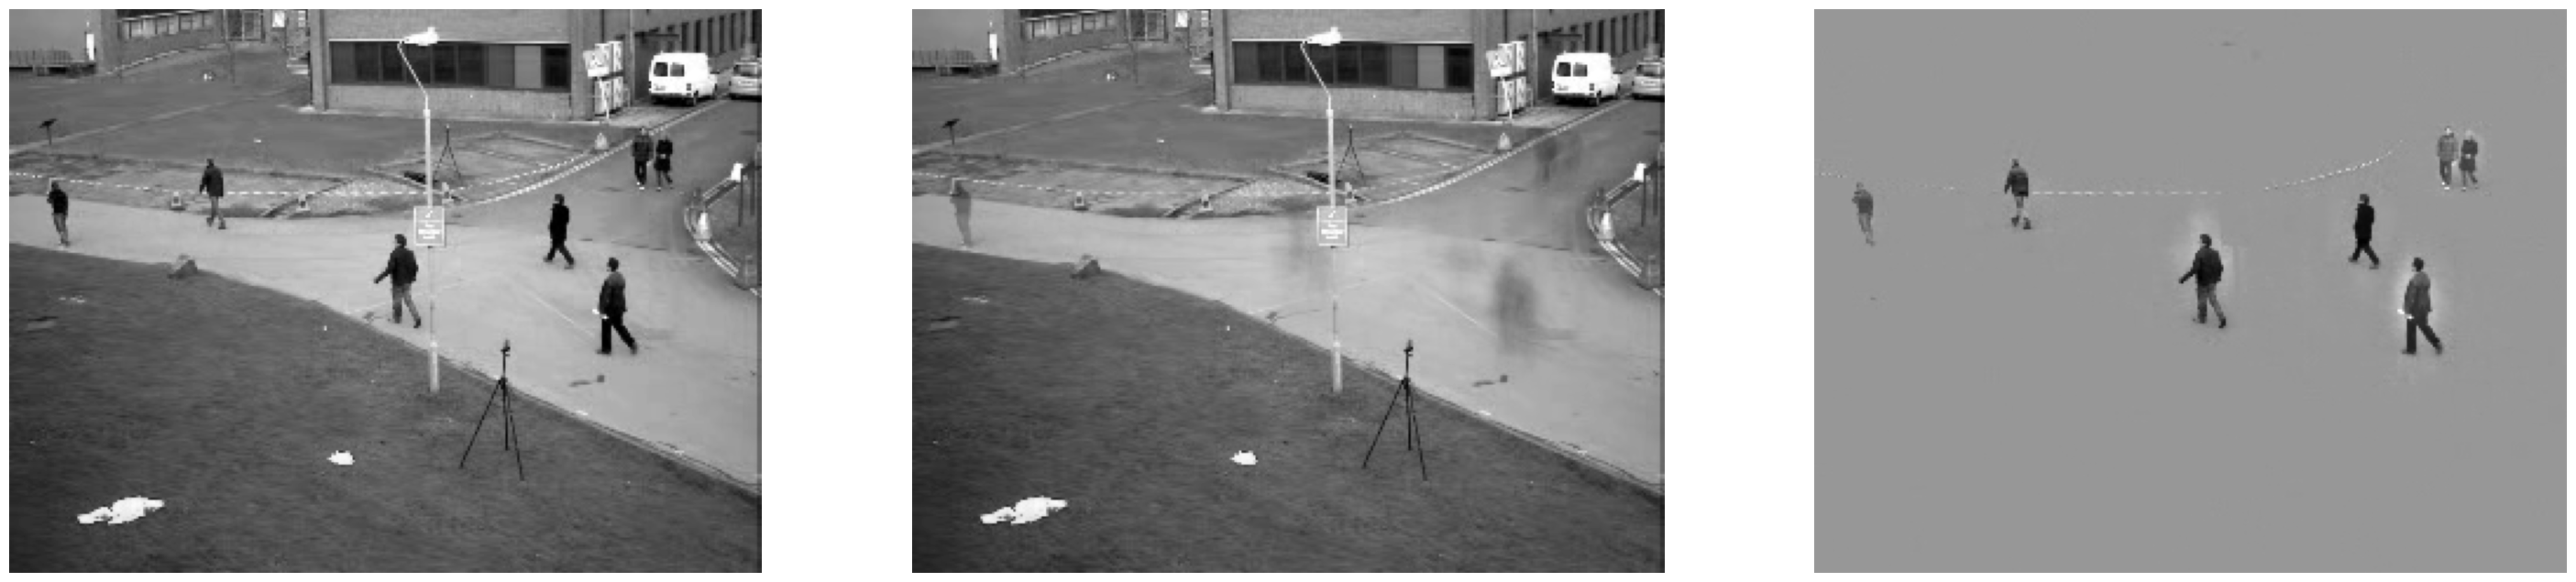

In [11]:
f, axes = plt.subplots(1, 3, figsize=(36, 8))

axes[0].imshow(frames_t[:, 250].reshape(240, 320), cmap="gray")
axes[1].imshow(L[:, 250].reshape(240, 320), cmap="gray")
axes[2].imshow(S[:, 250].reshape(240, 320), cmap="gray")

for ax in axes:
    ax.axis("off")

## Saving all frames of the video

You can then use something like https://ezgif.com/ to get the GIF of the image sequence

In [63]:
import os

os.makedirs("fg_images", exist_ok=True)

for i, frame in enumerate(S.T):
    
    frame_res = frame.reshape(240, 320)
    frame_res = ((frame_res-min_s)*255.0/(max_s-min_s))
    cv2.imwrite(os.path.join("fg_images", f"frame_{i}.jpg"), frame_res)
    
cv2.destroyAllWindows()

## Cool trick! Foreground detection with SVD

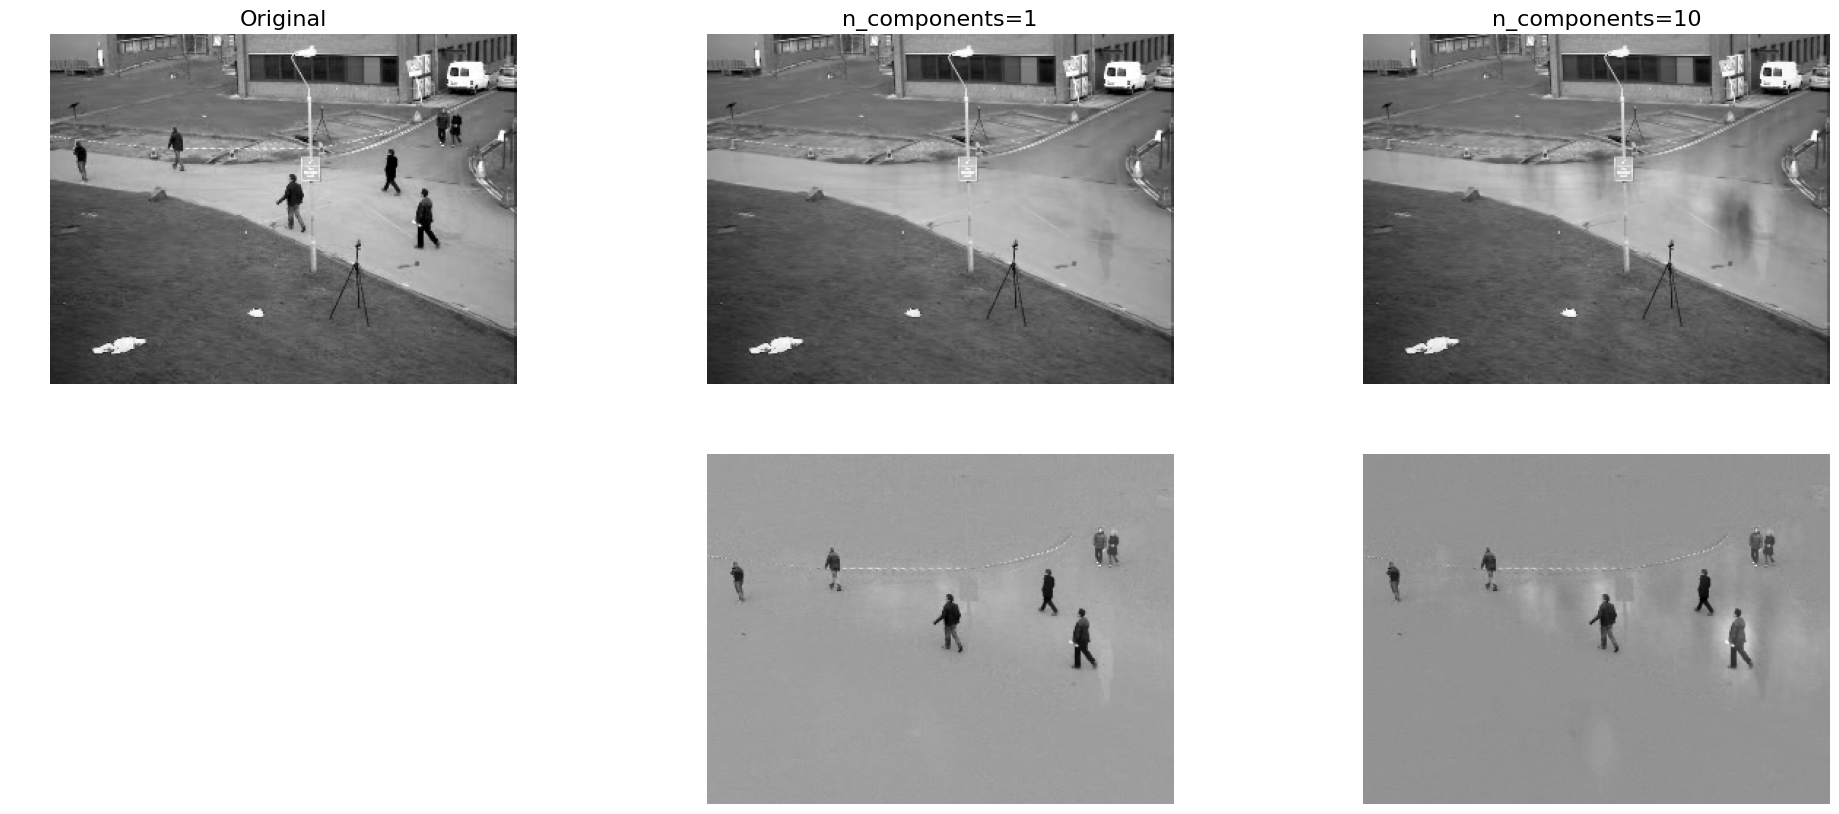

In [12]:
fontsize = 16

f, axes = plt.subplots(2, 3, figsize=(24, 10))

# Plot the original image
axes[0][0].imshow(frames_t[:, 250].reshape(240, 320), cmap='gray')
axes[0][0].axis("off")
axes[0][0].set_title("Original", fontsize=fontsize)
axes[1][0].axis("off")

for i, n_components in enumerate([1, 10]):
    
    # Get the singular components with n_components
    U, Sigma, V = randomized_svd(frames_t, n_components=n_components)
    # Get the low rank video
    low_rank_video = np.dot(np.dot(U, np.diag(Sigma)), V)
    sparse_video = frames_t - low_rank_video
    axes[0][i+1].imshow(low_rank_video[:, 250].reshape(240, 320), cmap="gray")
    axes[0][i+1].axis("off")
    axes[0][i+1].set_title(f"n_components={n_components}", fontsize=fontsize)
    axes[1][i+1].imshow(sparse_video[:, 250].reshape(240, 320), cmap="gray")
    axes[1][i+1].axis("off")

## References

[Light on Math ML: Intuitive Guide to Matrix Factorization (Part 1)](https://towardsdatascience.com/light-on-math-ml-intuitive-guide-to-matrix-factorization-bee5af0c01aa)